# <b><u> Project Title : Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


###**SOURCE OF DATA**
https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information(December 2017 to November2018).</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of the day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# Importing libraries

In [1]:
# Importing the  common libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import datetime as dt
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")


# Data Initialization

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/project/SeoulBikeData.csv'
bike_data = pd.read_csv(file_path, encoding= 'unicode_escape')

# Exploratory Data Analysis

## Taking a quick look at our Data

In [4]:
bike_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
bike_data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
# Data description
bike_data.describe().style.background_gradient()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [7]:
#reading no of row and column
bike_data.shape

(8760, 14)

In [8]:
# all the column or feature
bike_data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [9]:
bike_data=bike_data.rename(columns={'Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Rainfall(mm)':'Rainfall',
                                    'Snowfall (cm)':'Snowfall','Wind speed (m/s)':'Wind speed','Visibility (10m)':'Visibility','Solar Radiation (MJ/m2)':'Radiation','Dew point temperature(°C)':'Dew point temperature'})

# Finding datatypes of features in our dataset

In [10]:
#To find out categorical and numerical features in our dataset
bike_data.dtypes

Date                      object
Rented Bike Count          int64
Hour                       int64
Temperature              float64
Humidity                   int64
Wind speed               float64
Visibility                 int64
Dew point temperature    float64
Radiation                float64
Rainfall                 float64
Snowfall                 float64
Seasons                   object
Holiday                   object
Functioning Day           object
dtype: object

**There are 14 columns. 10 are numerical and 4 are categorical columns. 'date' column has multiple information, extracting those informations can be insightful.**

In [11]:
bike_data['Seasons']=bike_data['Seasons'].astype('category')
bike_data['Holiday'] = bike_data['Holiday'].astype('category')
bike_data['Functioning Day'] = bike_data['Functioning Day'].astype('category')

In [12]:
# convert Hour column integer to Object
bike_data['Hour']=bike_data['Hour'].astype('object')
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Date                   8760 non-null   object  
 1   Rented Bike Count      8760 non-null   int64   
 2   Hour                   8760 non-null   object  
 3   Temperature            8760 non-null   float64 
 4   Humidity               8760 non-null   int64   
 5   Wind speed             8760 non-null   float64 
 6   Visibility             8760 non-null   int64   
 7   Dew point temperature  8760 non-null   float64 
 8   Radiation              8760 non-null   float64 
 9   Rainfall               8760 non-null   float64 
 10  Snowfall               8760 non-null   float64 
 11  Seasons                8760 non-null   category
 12  Holiday                8760 non-null   category
 13  Functioning Day        8760 non-null   category
dtypes: category(3), float64(6), int64(3), ob

# checking for missing values

In [13]:
#data information for null value
bike_data.isna().sum()

Date                     0
Rented Bike Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind speed               0
Visibility               0
Dew point temperature    0
Radiation                0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning Day          0
dtype: int64

#checking for duplicate values

In [14]:
bike_data.duplicated().sum()

0

**There are no missing values and duplicate values in dataset**

# Extracting features from date

In [15]:
# split day of week, month and year in three column
bike_data['Date'] = pd.to_datetime(bike_data['Date'], format='%d/%m/%Y')
bike_data['day_of_week'] = bike_data['Date'].dt.day_name() # extract week name from Date column
bike_data['Week_day'] = bike_data['day_of_week'].apply(lambda x:'Weekend' if x=='Saturday' or x =='Sunday' else 'Weekdays')
bike_data["Month"] = bike_data['Date'].dt.month_name()  # extract month name from Date column
bike_data.drop(columns='day_of_week',inplace=True)
bike_data.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Week_day,Month
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Weekdays,December
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Weekdays,December
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Weekdays,December
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Weekdays,December
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Weekdays,December


In [16]:
# drop the Date column
bike_data.drop(columns=['Date'],inplace=True)

In [17]:
# Divide Data in categorical and numerical features
numeric_features= bike_data.select_dtypes(exclude=['object','category'])
categorical_features=bike_data.select_dtypes(include=['object','category'])


# Univariate Analysis

 Checking for Outliers





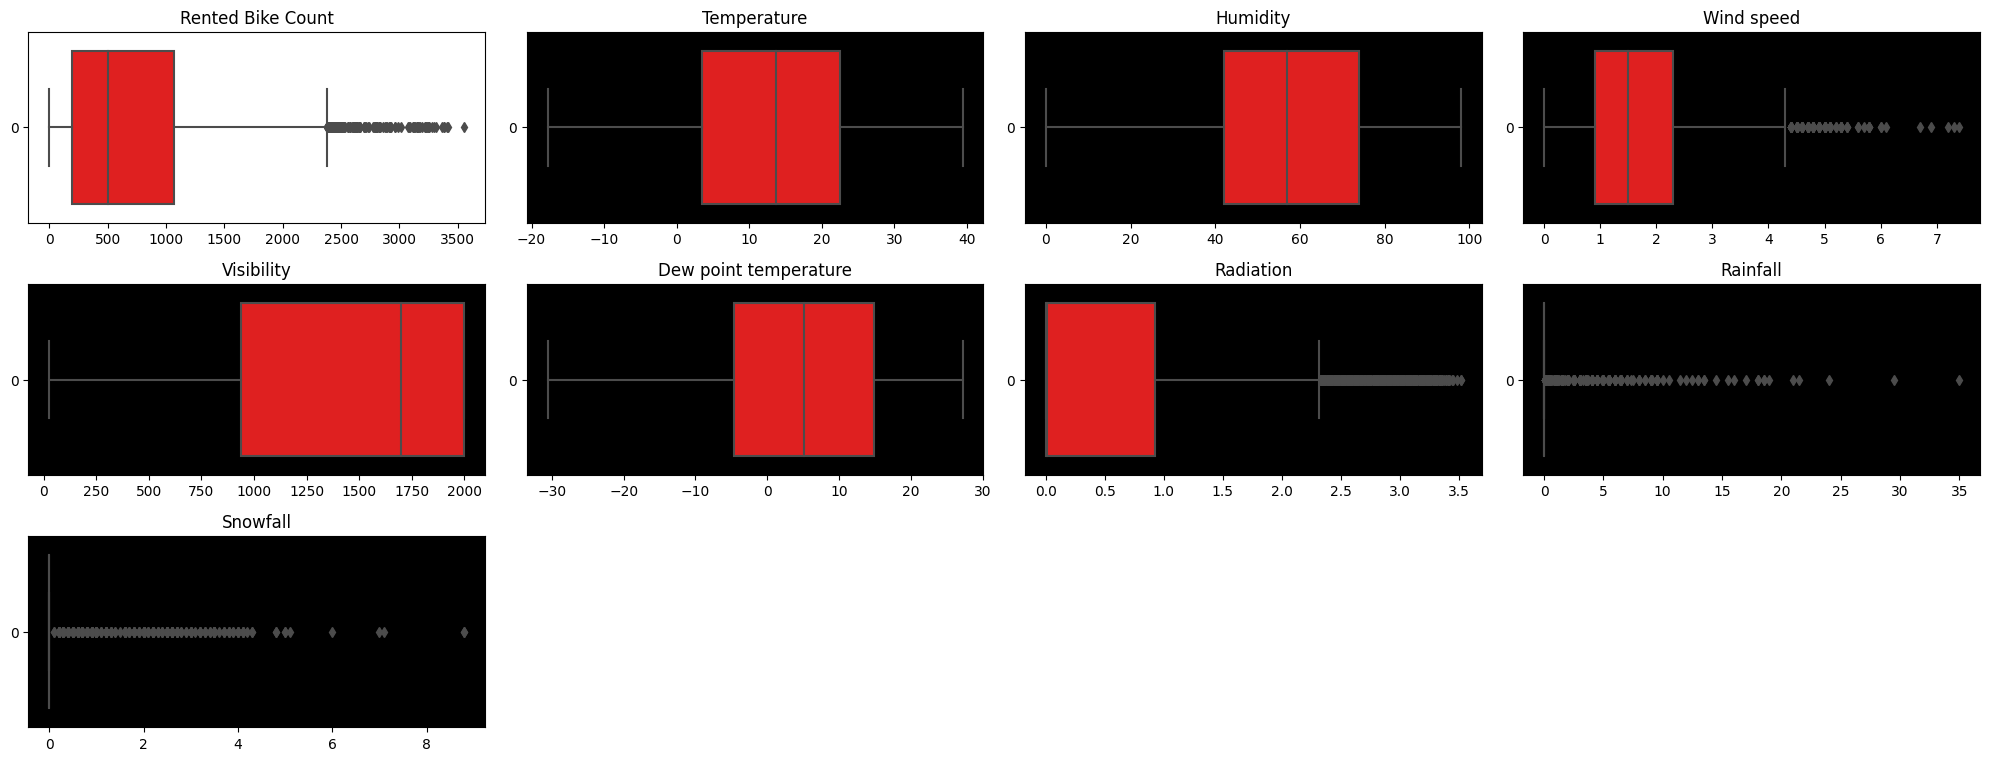

In [18]:

# checking Outliers with Boxplot
n = 1
plt.figure(figsize=(20,10))

for i in numeric_features.columns:
    plt.subplot(4,4,n)
    plt.rcParams['axes.facecolor'] = 'black'
    n=n+1
    sns.boxplot(bike_data[i],orient='h',color='red')
    plt.title(i)
    plt.tight_layout()


# Skewness Distribution

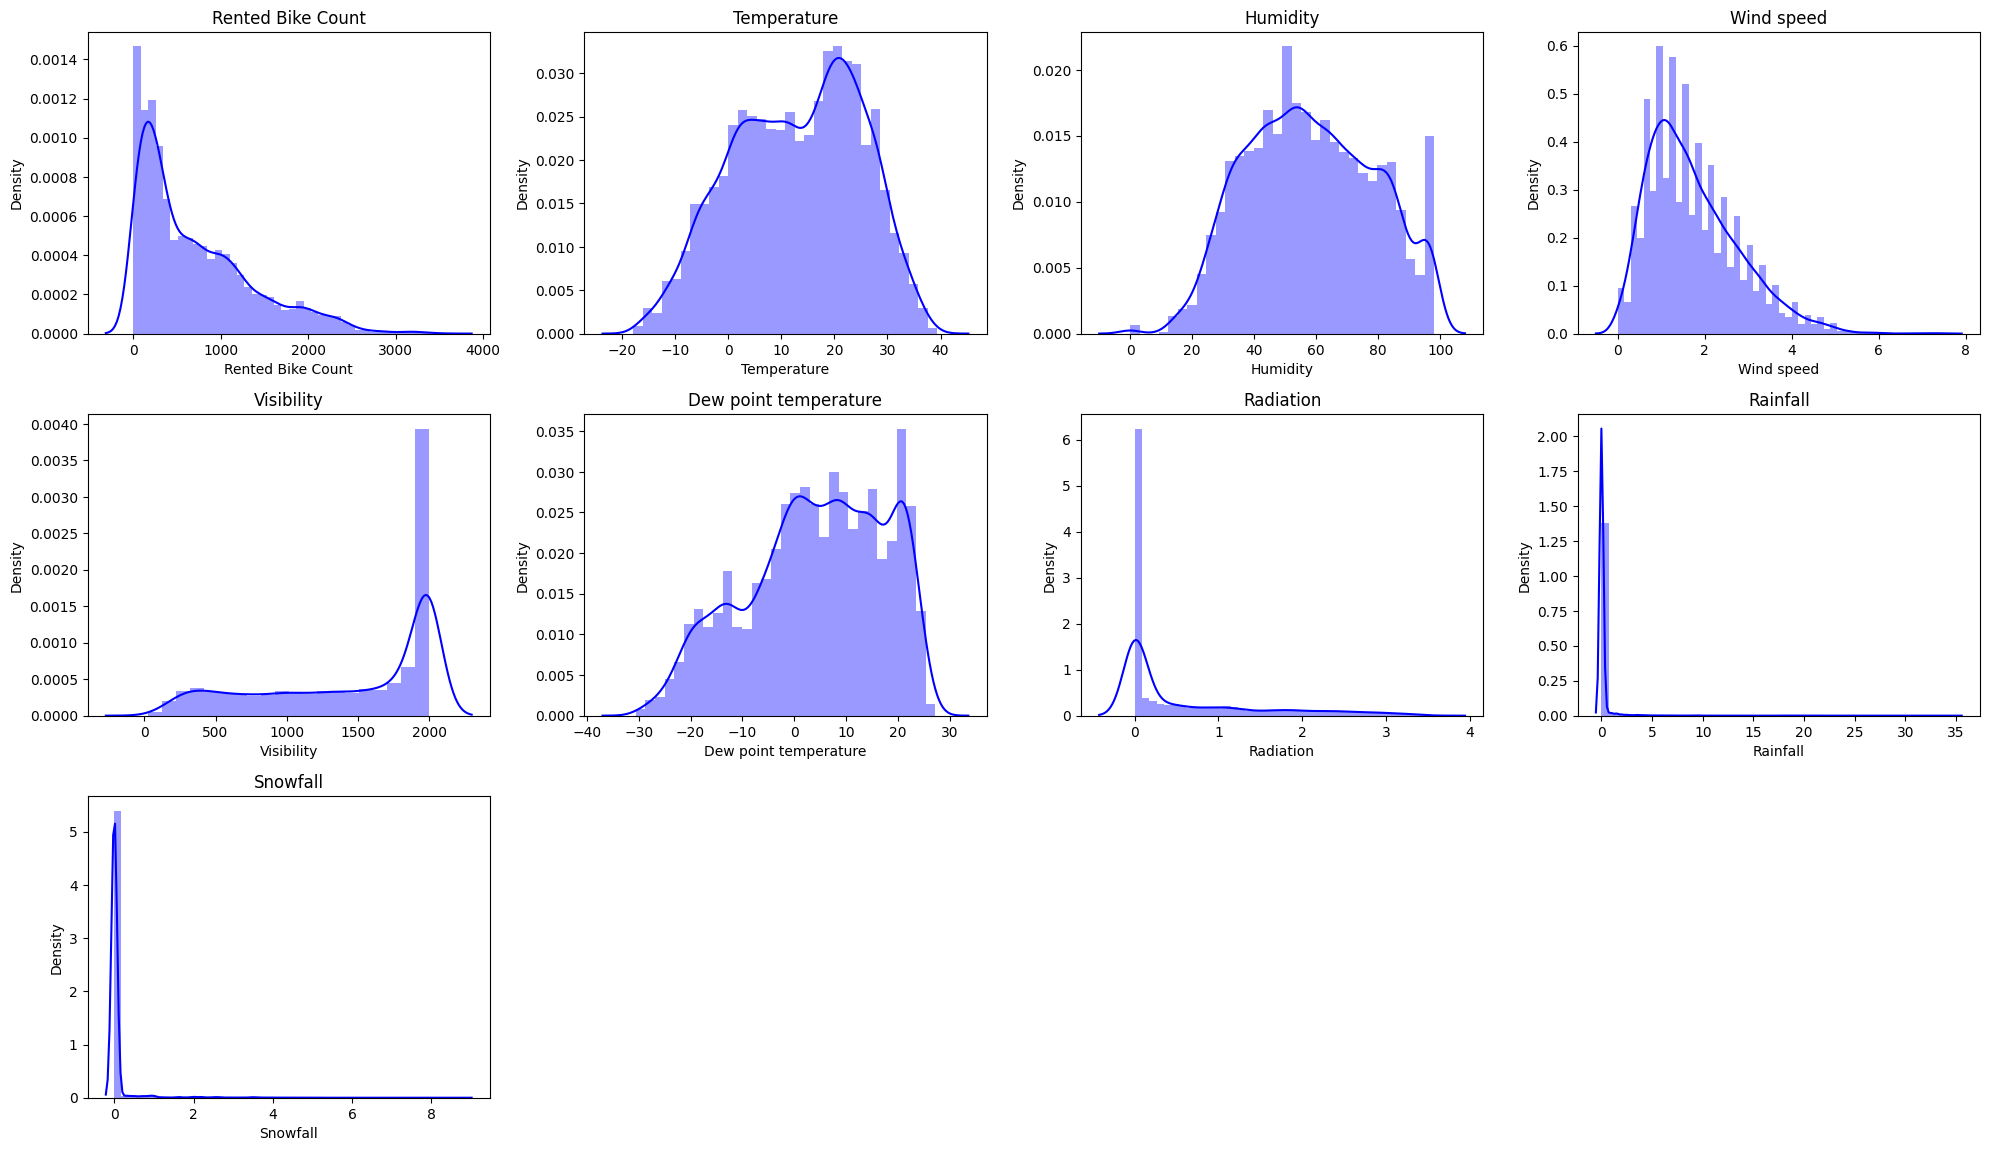

In [19]:
n = 1
plt.figure(figsize=(20,15))
plt.rcParams['axes.facecolor'] = 'white'
for i in numeric_features.columns:
  plt.subplot(4,4,n)
  n=n+1
  sns.distplot(bike_data[i],color='blue')
  plt.title(i)
  plt.tight_layout()

> Distribution of data of each variable clearly shows some are right skewed and some are left skewed




>Right skewed columns are:
Rented Bike Count (Its also our Dependent variable), Wind speed (m/s), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm),

>Left skewed columns are:
Visibility (10m), Dew point temperature(°C)



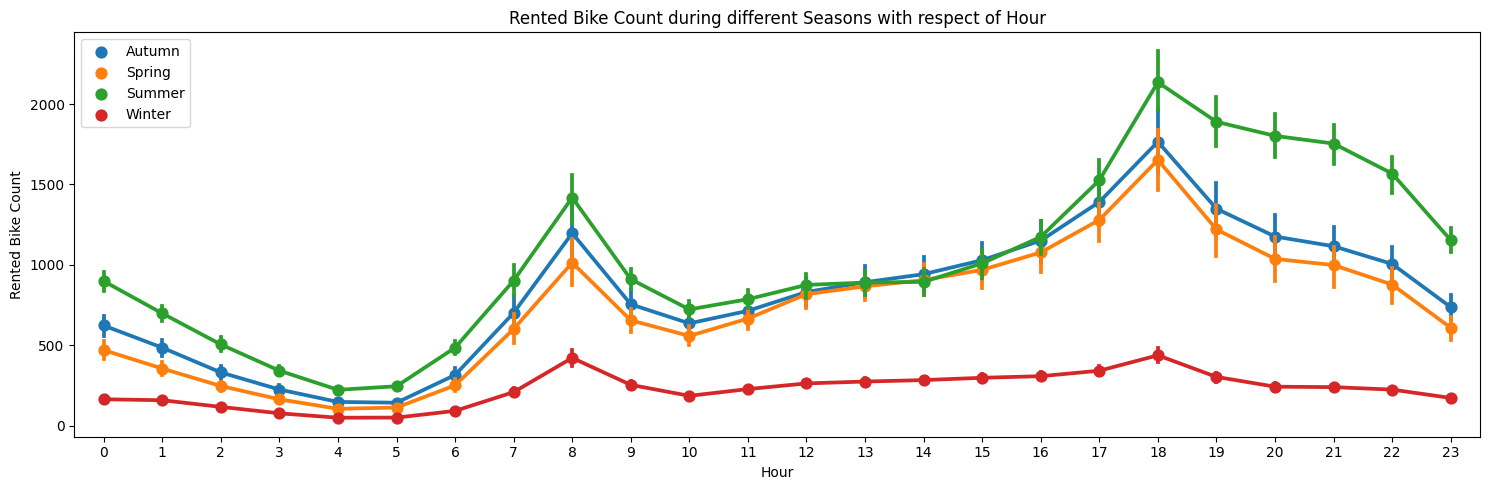

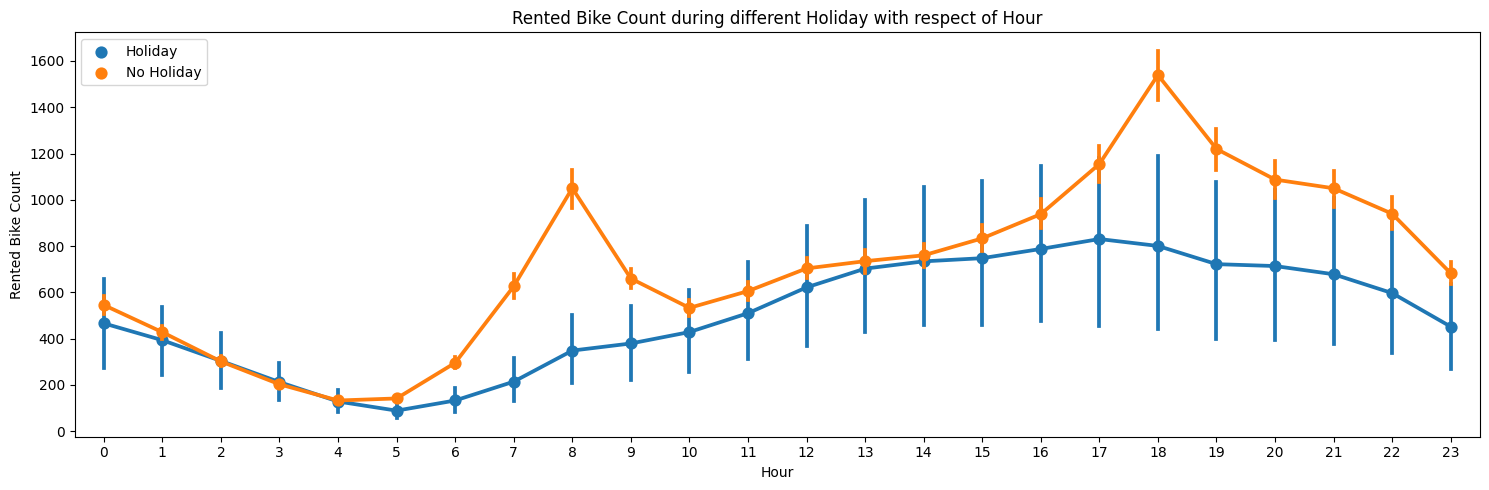

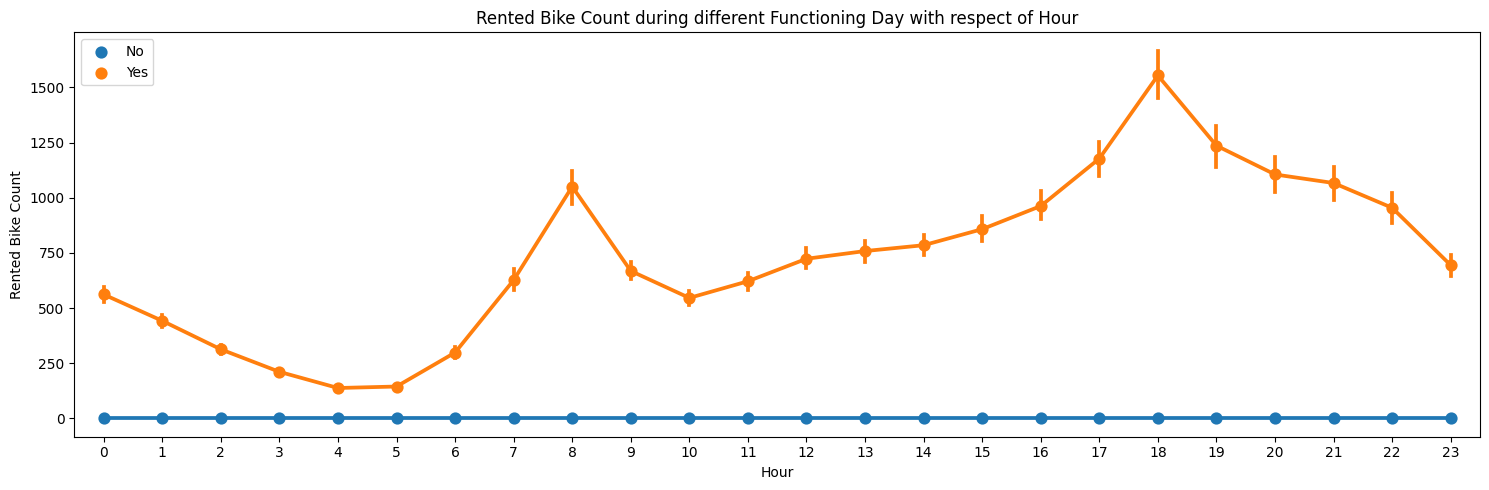

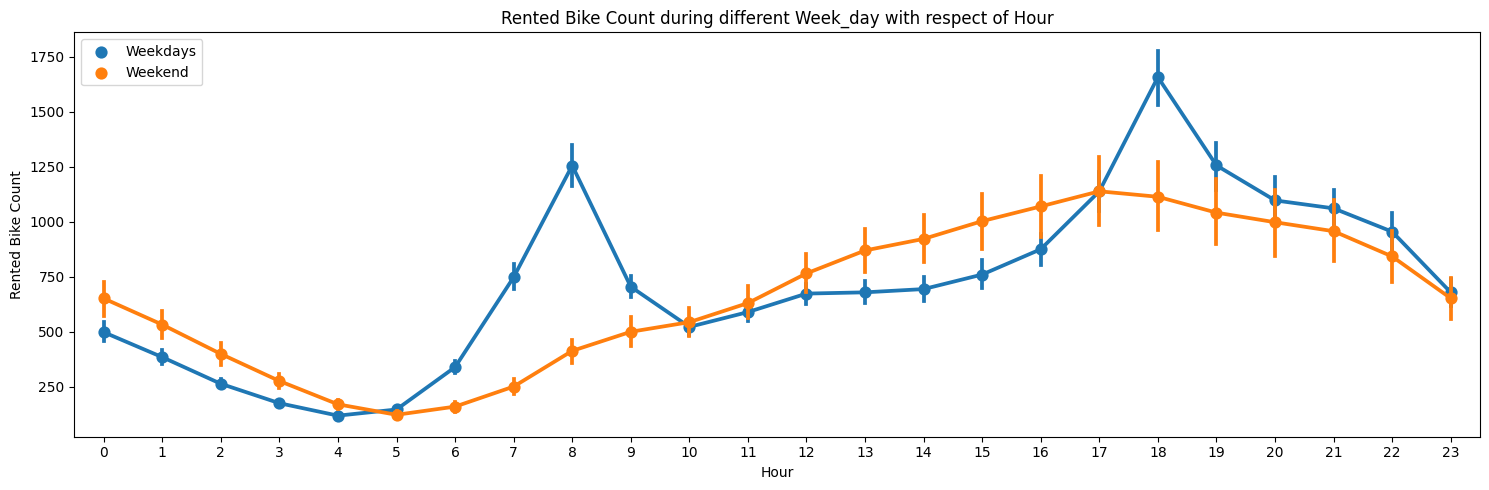

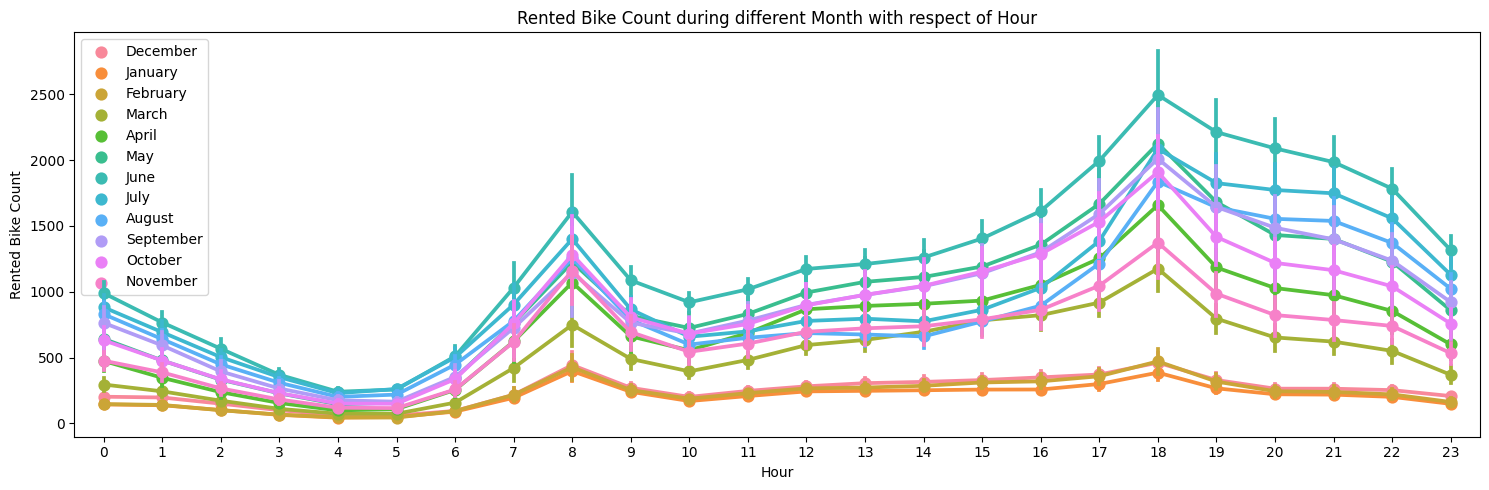

In [20]:
# we create point plots with Rented Bike Count with different categorical features at different Hour

for i in categorical_features.columns[1:]:
    plt.figure(figsize=(15,5))
    sns.pointplot(x=bike_data["Hour"],y=bike_data['Rented Bike Count'],hue=bike_data[i])
    plt.rcParams['axes.facecolor'] = 'white'
    plt.title(f"Rented Bike Count during different {i} with respect of Hour")
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

Text(0.5, 1.0, 'Plot between Hour and Rented bike count')

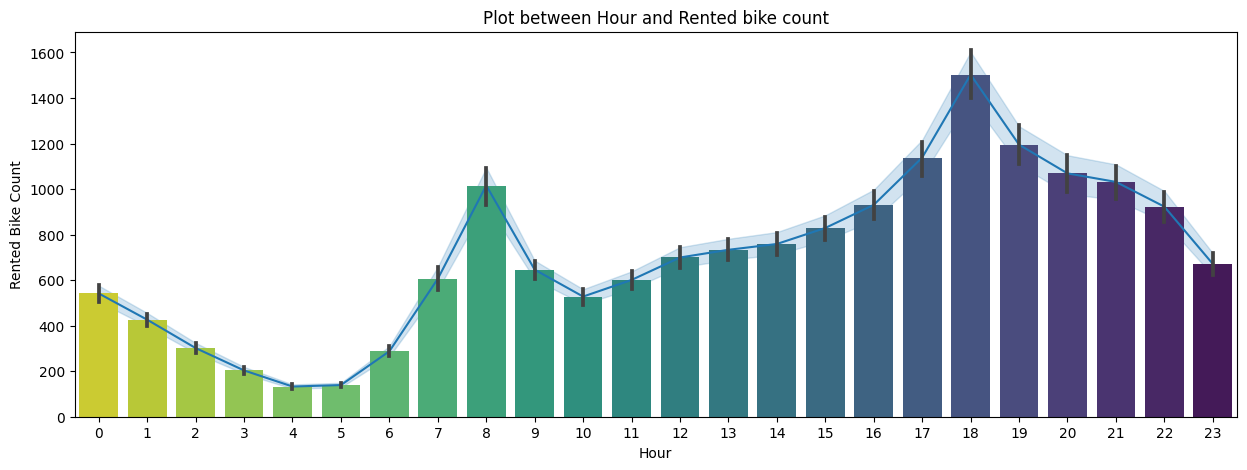

In [21]:
# bar plot between hr and rented bike count
plt.figure(figsize=(15,5))
sns.lineplot(x = bike_data['Hour'],y = bike_data['Rented Bike Count'])
plt.rcParams['axes.facecolor'] = 'black'
sns.barplot(x = bike_data['Hour'],y = bike_data['Rented Bike Count'], palette='viridis_r')
sns.set(style="ticks")
plt.title("Plot between Hour and Rented bike count")

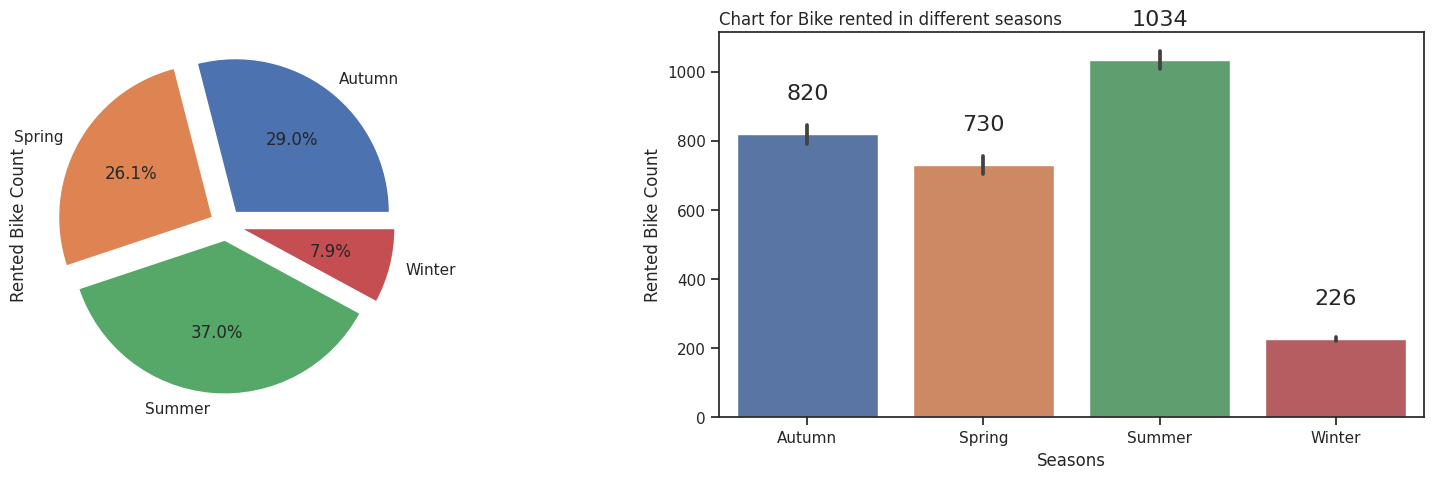

In [22]:
fig, axes = plt.subplots(ncols=2,figsize=(20,5))

# Plotting the bike rented per seasons using bar chart
ax = sns.barplot(x ="Seasons", y ="Rented Bike Count",data=bike_data)

# Plotting the bike rented per seasons using pie chart.
bike_data.groupby("Seasons")['Rented Bike Count'].sum().plot(kind='pie',ax = axes[0],autopct='%1.1f%%',explode=(0.1,0.1,0.1,0.1))
plt.title("Chart for Bike rented in different seasons",loc="left")

# Annotating the barplot.
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+100, '{:1.0f}'.format(height),ha = "center", fontsize= 16)

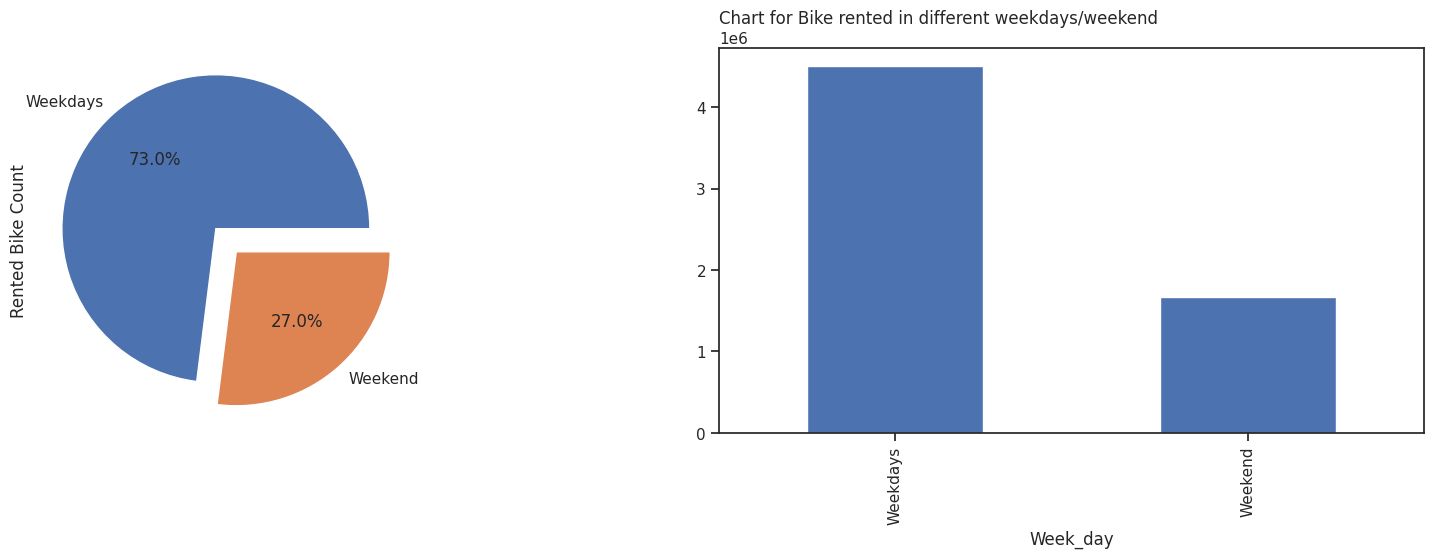

In [23]:
fig, axes = plt.subplots(ncols=2,figsize=(20,5))

# Plotting the bike rented per seasons using bar chart
bike_data.groupby("Week_day")['Rented Bike Count'].sum().plot(kind='bar')
plt.title("Chart for Bike rented in different weekdays/weekend",loc="left")

# Plotting the bike rented per seasons using pie chart.
bike_data.groupby("Week_day")['Rented Bike Count'].sum().plot(kind='pie',ax = axes[0],autopct='%1.1f%%',explode=(0.1,0.1))
plt.title("Chart for Bike rented in different weekdays/weekend",loc="left")

# Annotating the barplot.
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+100, '{:1.0f}'.format(height),ha = "center", fontsize= 16)

Text(0.5, 1.0, 'Bike rented in Different Months')

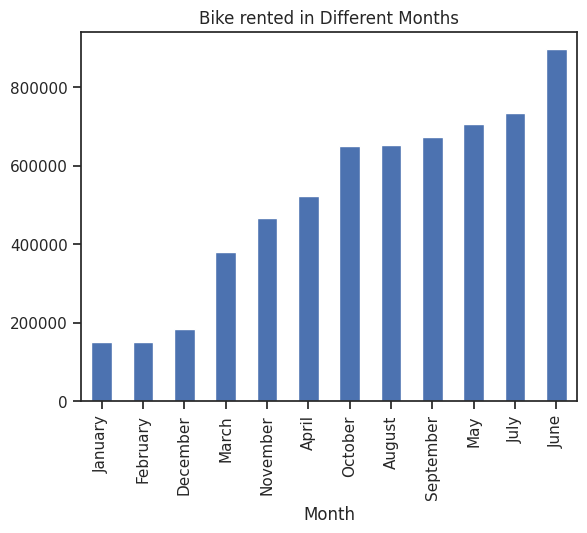

In [24]:
# month vs bike rented
bike_data.groupby('Month')['Rented Bike Count'].sum().sort_values(ascending =True).plot(kind = 'bar')
plt.title("Bike rented in Different Months")



In [25]:
numeric_features.columns

Index(['Rented Bike Count', 'Temperature', 'Humidity', 'Wind speed',
       'Visibility', 'Dew point temperature', 'Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

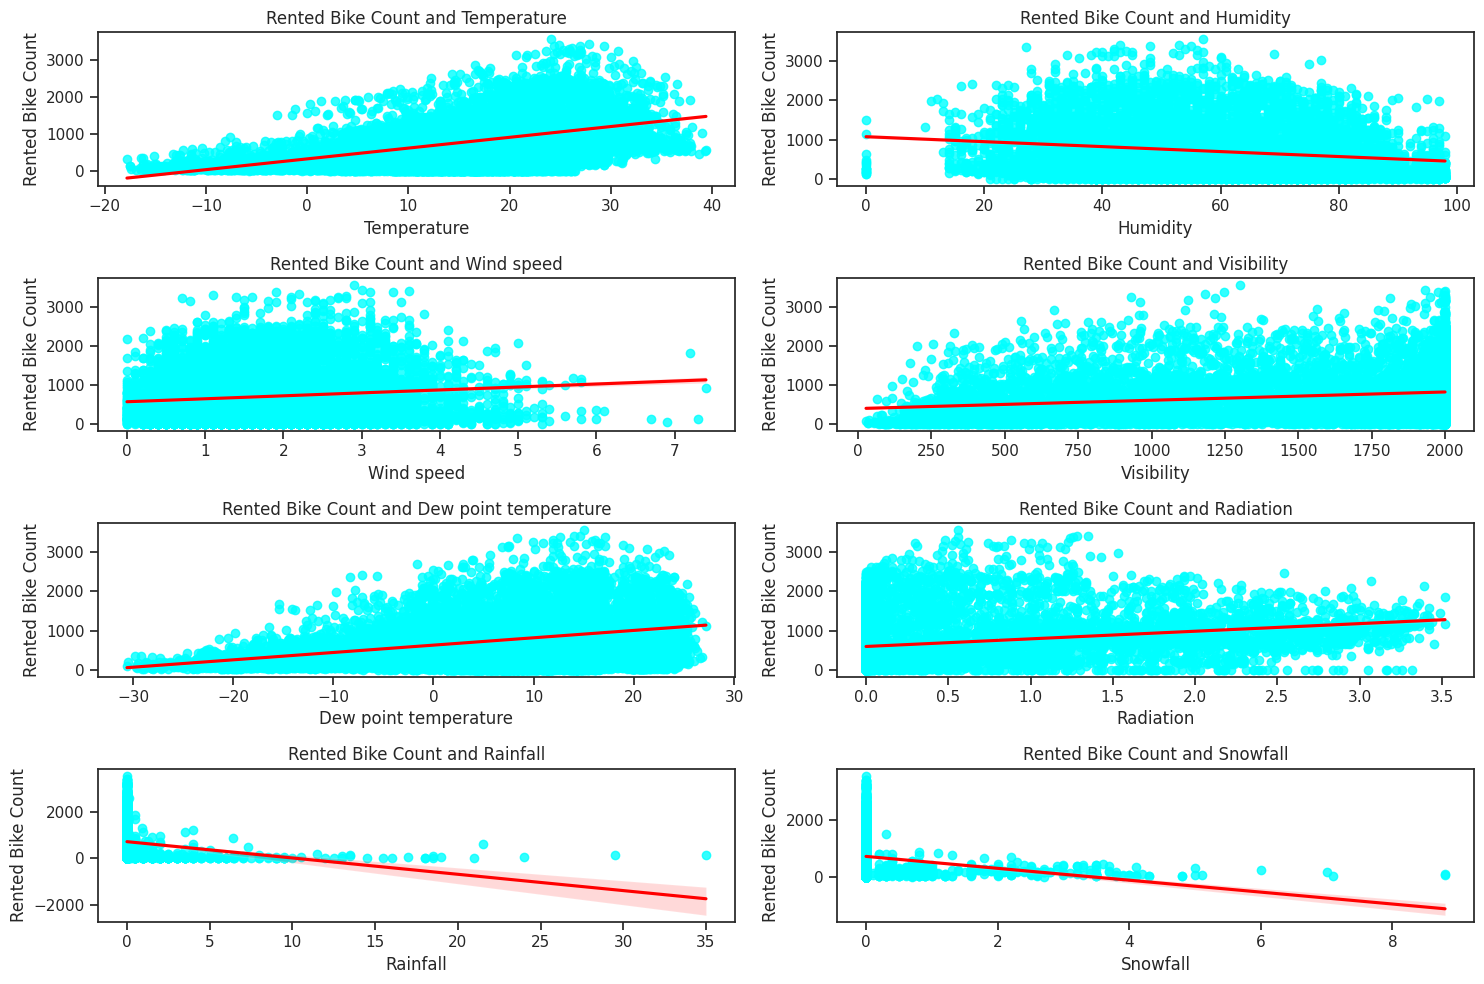

In [26]:
# Regression plot to know relation with our independent variable
n=1
plt.figure(figsize=(15,10))
for i in numeric_features.columns[1:]:
   plt.subplot(4,2,n)
   n+=1
   sns.regplot(x=bike_data[i], y=bike_data['Rented Bike Count'], scatter_kws={"color": "cyan"}, line_kws={"color": "red"})
   plt.title(f'Rented Bike Count and {i}')
   plt.tight_layout()

In [27]:
sns.pairplot(bike_data)
plt.figure(figsize=(20,8))

Output hidden; open in https://colab.research.google.com to view.

#Observation
From all these charts we made several conclusions :

#Season
In the season column, we are able to understand that the demand is low in the winter season and highest in summer

#Holiday
In the Holiday column, The demand is low during holidays, but during no holidays the demand is high, it may be because people use bikes to go to their work.

#Functioning Day
In the Functioning Day column, If there is no Functioning Day then there is no demand

#Week
In the week column, We can observe from this column that the pattern of weekdays and weekends is different. In the weekend the demand becomes high in the afternoon as people loves to travel during this hour . While the demand during office timings is high in weekdays as they might use them to reach office and return home

#Month
In the month column, We can clearly see that the demand is low in December January & Febuary, It is cold in these months and we have already seen in season column that demand is less in winters.It is high during July and June time as there might be vacations and people love to enjoy outings

#Rainfall and Snowfall
During snowfall and rainfall demand for bike decreases naturally.

#Feature Engineering

 Correlation Plot

<Axes: >

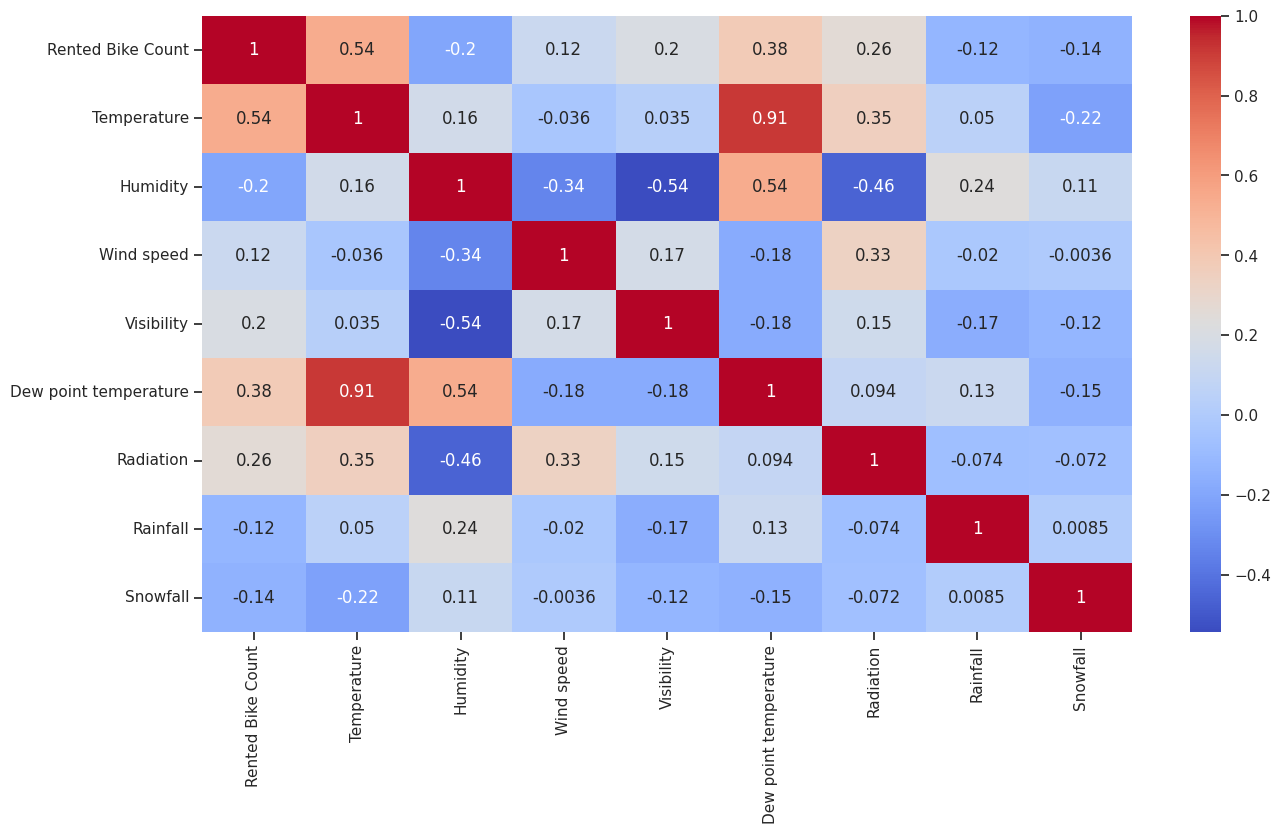

In [28]:
plt.figure(figsize=(15,8))
correlation = bike_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

From the correlation map it can be clearly seen temperature and dew point temperature are highly correlated . So we can drop dew point temperature column from the dataset We can also check variation inflation factor before dropping it

 Cramer's V


In [29]:
!pip install association_metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for association_metrics: filename=association_metrics-0.0.1-py3-none-any.whl size=3930 sha256=febf47bf4653b9be7e7c474ff7213550fc6014ae758352f41c263a0b6f23d7fc
  Stored in directory: /root/.cache/pip/wheels/01/47/5f/4360ef6988df6f1b0c1857cab43334269110160bd97b716936
Successfully built association_metrics


In [30]:
import association_metrics as am
data=bike_data.apply(lambda x : x.astype("category") if x.dtype=="O" else x)
cramers_v=am.CramersV(data)
cfit=cramers_v.fit().round(2)
cfit

,Hour,Seasons,Holiday,Functioning Day,Week_day,Month
Hour,1.00,0.00,0.00,0.01,0.00,0.00
Seasons,0.00,1.00,0.12,0.26,0.01,1.00
Holiday,0.00,0.12,1.00,0.03,0.03,0.19
Functioning Day,0.01,0.26,0.03,1.00,0.04,0.27
Week_day,0.00,0.01,0.03,0.04,1.00,0.06
Month,0.00,1.00,0.19,0.27,0.06,1.00


Variance Inflation Factor

In [31]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [32]:
calc_vif(bike_data[[i for i in bike_data.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Temperature,29.075866
1,Humidity,5.069743
2,Wind speed,4.517664
3,Visibility,9.051931
4,Dew point temperature,15.201989
5,Radiation,2.821604
6,Rainfall,1.079919
7,Snowfall,1.118903


In [33]:
# dew point column dropped based on VIF and Corr plot
bike_data.drop(columns = 'Dew point temperature',axis=1,inplace =True)

In [34]:
calc_vif(bike_data[[i for i in bike_data.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])

,variables,VIF
0,Temperature,3.166007
1,Humidity,4.758651
2,Wind speed,4.079926
3,Visibility,4.409448
4,Radiation,2.246238
5,Rainfall,1.078501
6,Snowfall,1.118901


In [35]:
numeric_features.drop('Dew point temperature',axis=1,inplace=True)

#Data Normalisation

In [36]:
var=list(bike_data.select_dtypes(include=['float64','int64']).columns)
var

['Rented Bike Count',
 'Temperature',
 'Humidity',
 'Wind speed',
 'Visibility',
 'Radiation',
 'Rainfall',
 'Snowfall']

# Skewness Distribution of Target Variable After  Transformation

Text(0.5, 1.0, 'Square root')

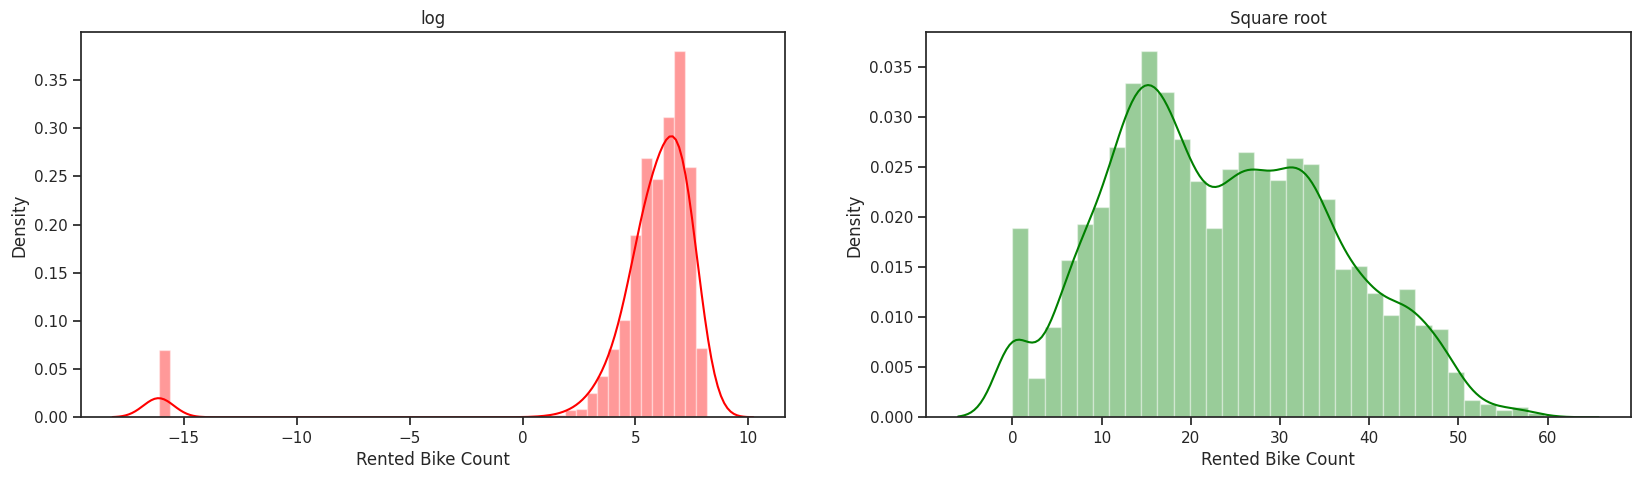

In [37]:
fig,axes = plt.subplots(1,2,figsize=(20,5))
sns.distplot(np.log(bike_data['Rented Bike Count']+0.0000001),ax=axes[0],color='red').set_title("log")
sns.distplot(np.sqrt(bike_data['Rented Bike Count']),ax=axes[1], color='green').set_title("Square root")

In [38]:
bike_data['Rented Bike Count']=np.sqrt(bike_data['Rented Bike Count'])
bike_data['Rented Bike Count'].skew()

0.237362090985412

one_hot encoding

In [39]:
bike_data = pd.get_dummies(bike_data,drop_first=True)
bike_data

,Rented Bike Count,Temperature,Humidity,Wind speed,Visibility,Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,15.937377,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,14.282857,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,13.152946,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,10.344080,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.831761,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,31.670175,4.2,34,2.6,1894,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
8756,27.640550,3.4,37,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
8757,26.343880,2.6,39,0.3,1968,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
8758,26.683328,2.1,41,1.0,1859,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0


Our Dataset is ready.

In [40]:
X = bike_data.drop(columns='Rented Bike Count')
Y = bike_data['Rented Bike Count']

# Model Building

# Train Test Split for Model

In [41]:
#import train-test split lib
from sklearn.model_selection import train_test_split

In [42]:
# function which split data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=34)

In [43]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(7008, 47) (7008,)
(1752, 47) (1752,)


In [44]:
X_train

,Temperature,Humidity,Wind speed,Visibility,Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
5401,25.4,85,1.4,1663,0.00,0.0,0.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
5004,24.1,73,2.2,992,2.15,0.0,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1113,1.9,65,0.8,402,0.06,0.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1654,-6.8,50,1.7,1856,0.00,0.0,0.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4014,18.9,98,0.3,338,0.00,0.0,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5667,28.9,69,2.8,1871,0.00,0.0,0.0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
324,-4.9,34,1.3,1768,0.60,0.0,0.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3157,15.6,38,4.7,1558,3.32,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5993,35.6,44,2.4,1860,1.69,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Feature Scaling

In [45]:

num_vars = ['Temperature','Humidity','Wind speed','Visibility','Radiation','Rainfall','Snowfall']


In [46]:
from sklearn.preprocessing import PowerTransformer

yeo = PowerTransformer()
X_train_scaled =yeo.fit_transform(X_train)# fit transform the training set
X_test_scaled = yeo.transform(X_test) #tranform the test set

In [47]:
X_train_scaled

array([[ 1.04297292,  1.29466233, -0.15744499, ..., -0.29755136,
        -0.30319787, -0.30655244],
       [ 0.93533911,  0.74247193,  0.61286874, ..., -0.29755136,
        -0.30319787, -0.30655244],
       [-0.91758878,  0.36486738, -0.93083382, ..., -0.29755136,
        -0.30319787, -0.30655244],
       ...,
       [ 0.22991796, -0.98483727,  2.14949259, ..., -0.29755136,
        -0.30319787, -0.30655244],
       [ 1.8856851 , -0.67258172,  0.7748095 , ..., -0.29755136,
        -0.30319787, -0.30655244],
       [ 0.92705713, -0.4184373 ,  0.15830858, ..., -0.29755136,
        -0.30319787, -0.30655244]])

# In this project we are using Six model on our data set for getting best performance:-
LINEAR REGRESSION

POLYNOMIAL REGRESSION

KNN  REGRESSION

DECISION TREE

RANDOM FORREST

XGBOOST

# Linear Regression Model

In [48]:
#importing linear regression model

reg= LinearRegression().fit(X_train_scaled, y_train)

In [49]:
# predion on  train and test
y_pred_train=reg.predict(X_train_scaled)
y_pred_test=reg.predict(X_test_scaled)
accuracies = cross_val_score(estimator = reg, X = X_train_scaled, y = y_train, cv = 5)

In [50]:
# Evaluation Metric

def score_metrics(actual,predicted):
    mse = mean_squared_error(actual,predicted)
    print('mean squared error is  :',mse)
    print('Root mean squared error is  :',np.sqrt(mse))
    print("R2 score is  :",r2_score(actual,predicted))
    print("Adjusted R2 :",1-(1-r2_score(actual, predicted))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

In [51]:
# MODEL EVALUATION ON TRAIN DATA

score_metrics(y_train, y_pred_train)
print("Cross Val Accuracy: {:.2f}".format(accuracies.mean()))

mean squared error is  : 28.942218009036278
Root mean squared error is  : 5.37979720891376
R2 score is  : 0.8112909691111917
Adjusted R2 : 0.8060859664986483
Cross Val Accuracy: 0.81


In [52]:
# MODEL EVALUATION ON TEST DATA

score_metrics(y_test, y_pred_test)

mean squared error is  : 30.9978755653287
Root mean squared error is  : 5.5675735796959795
R2 score is  : 0.8080318180161579
Adjusted R2 : 0.8027369209778711


RFE

In [53]:
from sklearn.feature_selection import RFE
# Create the RFE selector
selector = RFE(reg,n_features_to_select=15)  # Select top 15 features

# Apply feature selection on the normalized training data
X_train_selected = selector.fit_transform(X_train_scaled, y_train)

# Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Print the selected feature indices
selected_feature_names = X_train.columns[selected_feature_indices]
print(selected_feature_names)
print(selected_feature_indices)

Index(['Temperature', 'Humidity', 'Rainfall', 'Hour_3', 'Hour_4', 'Hour_5',
       'Hour_8', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22',
       'Seasons_Winter', 'Functioning Day_Yes', 'Month_June'],
      dtype='object')
[ 0  1  5  9 10 11 14 24 25 26 27 28 32 34 41]


In [54]:
X_train_select_features = X_train[['Temperature', 'Humidity', 'Rainfall', 'Hour_3', 'Hour_4', 'Hour_5',
       'Hour_8', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22',
       'Seasons_Winter', 'Functioning Day_Yes', 'Month_June']]
X_test_select_features = X_test[['Temperature', 'Humidity', 'Rainfall', 'Hour_3', 'Hour_4', 'Hour_5',
       'Hour_8', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22',
       'Seasons_Winter', 'Functioning Day_Yes', 'Month_June']]


In [55]:
yeo = PowerTransformer()
X_train_select_scaled =yeo.fit_transform(X_train_select_features)# fit transform the training set
X_test_select_scaled = yeo.transform(X_test_select_features) #tranform the test set

In [56]:
# predion on  train and test
reg_select= LinearRegression().fit(X_train_select_features, y_train)
y_pred_train_select=reg_select.predict(X_train_select_features)
y_pred_test_select=reg_select.predict(X_test_select_features)
accuracies_select = cross_val_score(estimator = reg, X = X_train_select_scaled, y = y_train, cv = 5)

In [57]:
# MODEL EVALUATION ON TEST DATA

score_metrics(y_test, y_pred_test_select)

mean squared error is  : 46.61173688012483
Root mean squared error is  : 6.827278878156716
R2 score is  : 0.7113360117492978
Adjusted R2 : 0.7033740355475473


OLS

In [58]:

import statsmodels.api as sm
X_train_scaled_new = sm.add_constant(X_train_scaled)
lin_reg=sm.OLS(y_train,X_train_scaled_new).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     680.3
Date:                Sun, 18 Jun 2023   Prob (F-statistic):               0.00
Time:                        05:06:08   Log-Likelihood:                -21736.
No. Observations:                7008   AIC:                         4.356e+04
Df Residuals:                    6963   BIC:                         4.387e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.5121      0.064    364.690      0.000      23.386      23.638
x1             4.9661      0.214     23.237      0.000       4.547       5.385
x2            -1.2551      0.114    -10.998      0.000      -1.479      -1.031
x3            -0.0229      0.077     -0.297      0.766      -0.174       0.128
x4             0.3866      0.097      4.005      0.000       0.197       0.576
x5             2.9227      0.197     14.822      0.000       2.536       3.309
x6            -2.9628      0.074    -40.213      0.000      -3.107      -2.818
x7             0.0030      0.073      0.041      0.967      -0.139       0.145
x8            -0.4585      0.088     -5.201      0.000      -0.631      -0.286
x9            -0.9932      0.089    -11.193      0.000      -1.167      -0.819
x10           -1.4926      0.090    -16.655      0.000      -1.668      -1.317
x11           -1.9616      0.088    -22.262      0.000      -2.134      -1.789
x12           -1.9700      0.090    -21.909      0.000      -2.146      -1.794
x13           -0.9314      0.089    -10.422      0.000      -1.107      -0.756
x14            0.0549      0.092      0.600      0.548      -0.124       0.234
x15            0.9780      0.096     10.140      0.000       0.789       1.167
x16           -0.4857      0.108     -4.493      0.000      -0.698      -0.274
x17           -1.4394      0.113    -12.686      0.000      -1.662      -1.217
x18           -1.4410      0.116    -12.414      0.000      -1.669      -1.213
x19           -1.2255      0.120    -10.223      0.000      -1.460      -0.991
x20           -1.2563      0.118    -10.626      0.000      -1.488      -1.025
x21           -1.2675      0.120    -10.585      0.000      -1.502      -1.033
x22           -0.9536      0.115     -8.286      0.000      -1.179      -0.728
x23           -0.6137      0.111     -5.515      0.000      -0.832      -0.396
x24            0.2831      0.105      2.691      0.007       0.077       0.489
x25            1.6335      0.095     17.162      0.000       1.447       1.820
x26            1.2539      0.090     13.858      0.000       1.077       1.431
x27            1.2804      0.090     14.239      0.000       1.104       1.457
x28            1.3233      0.089     14.915      0.000       1.149       1.497
x29            1.0444      0.088     11.817      0.000       0.871       1.218
x30            0.2910      0.090      3.243      0.001       0.115       0.467
x31           -0.1033      0.076     -1.366      0.172      -0.252       0.045
x32           -0.1475      0.067     -2.190      0.029      -0.280      -0.015
x33           -1.1350      0.075    -15.213      0.000      -1.281      -0.989
x34            0.6647      0.066     10.079      0.000       0.535       0.794
x35            5.2413      0.067     78.174      0.000       5.110       5.373
x3

In [ ]:
x_train

In [59]:
# Checking for heteroskedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
residual=y_test-y_pred_test
bp_test = het_breuschpagan(residual, np.column_stack((y_pred_test, np.square(y_pred_test))))
print('Breusch-Pagan test p-value:', bp_test[1])

Breusch-Pagan test p-value: 1.6335349699963812e-88


In [60]:
np.mean(residual)

-0.06294574836763964

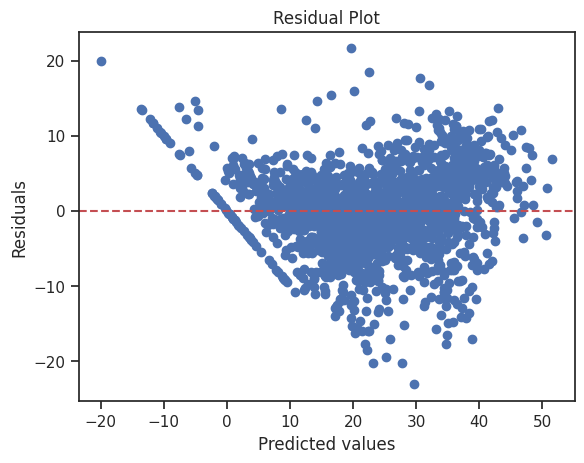

In [61]:

plt.scatter(y_pred_test, residual)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

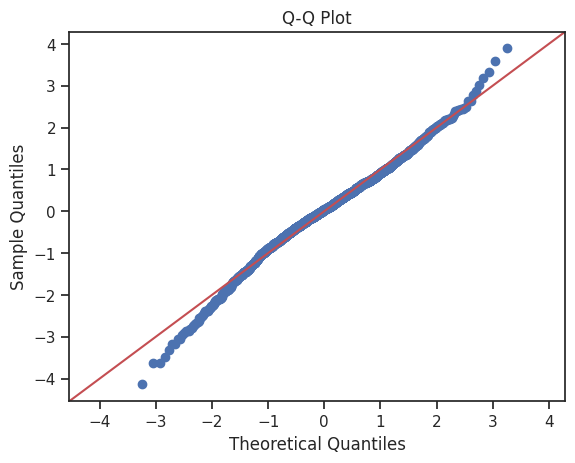

In [62]:
import statsmodels.api as sm
sm.qqplot(residual,fit=True,line='45')
plt.title('Q-Q Plot')
plt.show()

## POLYNOMIAL

In [63]:

poly = PolynomialFeatures(degree=2)
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.transform(X_test)

In [64]:
poly_reg = LinearRegression().fit(poly_X_train,y_train)


In [65]:
poly_pred_train = poly_reg.predict(poly_X_train)
poly_pred_test = poly_reg.predict(poly_X_test)


In [66]:
# MODEL EVALUATION ON TRAIN DATA
score_metrics(y_train,poly_pred_train)

mean squared error is  : 11.090474460013953
Root mean squared error is  : 3.330236397016577
R2 score is  : 0.9276878956964224
Adjusted R2 : 0.9256933716927439


In [67]:
# MODEL EVALUATION ON TEST DATA

score_metrics(y_test,poly_pred_test)

mean squared error is  : 17.290140023922056
Root mean squared error is  : 4.158141414613271
R2 score is  : 0.8929230895309845
Adjusted R2 : 0.8899696770943392


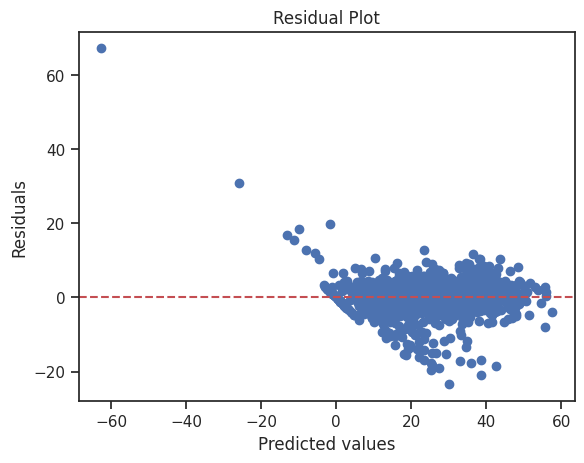

In [68]:
residual_poly=y_test-poly_pred_test
plt.scatter(poly_pred_test, residual_poly)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [69]:
# Checking for heteroskedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(residual_poly, np.column_stack((poly_pred_test, np.square(poly_pred_test))))
print('Breusch-Pagan test p-value:', bp_test[1])

Breusch-Pagan test p-value: 1.914992992513357e-72


#KNN Regressor

In [70]:
# Create a KNN regressor
knn_regressor = KNeighborsRegressor()

k_val =np.arange(5,60)

# Define the grid of hyperparameters to search
param_grid = {'n_neighbors': k_val }

# Perform grid search with cross-validation to find the optimal K
grid_search = GridSearchCV(knn_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best K value and the corresponding model
best_k = grid_search.best_params_['n_neighbors']
best_model = grid_search.best_estimator_

# Predict on the test and train set using the best model
y_pred_knn_test = best_model.predict(X_test_scaled)



# Evaluate the model
mse = mean_squared_error(y_test, y_pred_knn_test)
print("Best K:", best_k)
print("Mean Squared Error:", mse)


Best K: 5
Mean Squared Error: 29.532816311974194


In [71]:
model = KNeighborsRegressor(n_neighbors =best_k )
model.fit(X_train_scaled, y_train)
y_pred_knn_train=model.predict(X_train_scaled)
y_pred = model.predict(X_test_scaled) #make prediction on test set


In [72]:
# MODEL EVALUATION ON TEST DATA

score_metrics(y_test, y_pred_knn_test)

mean squared error is  : 29.532816311974194
Root mean squared error is  : 5.434410392303308
R2 score is  : 0.8171048514494439
Adjusted R2 : 0.8120602082675916


In [73]:
# MODEL EVALUATION ON TRAIN DATA

score_metrics(y_train, y_pred_knn_train)

mean squared error is  : 16.586777429658472
Root mean squared error is  : 4.0726867581068
R2 score is  : 0.891850904676969
Adjusted R2 : 0.8888679190665333


# Implementing Decision tree regressor

In [74]:
#importing the decision tree model for training
decision_regressor = DecisionTreeRegressor(max_depth=8)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [75]:
#y pred for test and train data
y_pred_train_dt = decision_regressor.predict(X_train)
y_pred_test_dt = decision_regressor.predict(X_test)

In [76]:
# MODEL EVALUATION ON TRAIN DATA

score_metrics(y_train,y_pred_train_dt)
accuracies = cross_val_score(estimator = decision_regressor, X = X_train, y = y_train, cv = 5)
print('Cross validation accuracy :', np.mean(accuracies))

mean squared error is  : 35.820931714284235
Root mean squared error is  : 5.985059040166958
R2 score is  : 0.7664403845197266
Adjusted R2 : 0.7599983059237332
Cross validation accuracy : 0.729603205495733


In [77]:
# MODEL EVALUATION ON TEST DATA

score_metrics(y_test,y_pred_test_dt)

mean squared error is  : 44.571812946895
Root mean squared error is  : 6.676212470173114
R2 score is  : 0.7239691513340463
Adjusted R2 : 0.7163556244048797


# Implementing Random forest Rergressor

In [78]:

rf_model=RandomForestRegressor(n_estimators=100,max_depth=12,random_state=42)
rf_model.fit(X_train,y_train)



RandomForestRegressor(max_depth=12, random_state=42)

In [79]:
# Making predictions on train and test data in rf

y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

In [80]:
# MODEL EVALUATION ON TRAIN DATA

score_metrics(y_train,y_pred_train_rf)
accuracies = cross_val_score(estimator = rf_model, X = X_train, y = y_train, cv = 5)
print('Cross validation accuracy :', np.mean(accuracies))

mean squared error is  : 13.77541350986559
Root mean squared error is  : 3.711524418600205
R2 score is  : 0.9101815578637509
Adjusted R2 : 0.9077041712555327
Cross validation accuracy : 0.8724764577051312


In [81]:
# MODEL EVALUATION ON TEST DATA

score_metrics(y_test,y_pred_test_rf)


mean squared error is  : 21.608876162186906
Root mean squared error is  : 4.648534840375718
R2 score is  : 0.866177388097886
Adjusted R2 : 0.8624862714550461


In [82]:
# random forest important feature selection
rf_model.feature_importances_

array([3.34409645e-01, 1.56036854e-01, 4.86580080e-03, 6.22623287e-03,
       2.39850694e-02, 3.67807316e-02, 8.86907601e-04, 8.79102866e-04,
       1.10444134e-02, 2.53785564e-02, 3.30778568e-02, 3.04819903e-02,
       6.50749618e-03, 1.75618113e-03, 1.30418227e-02, 3.28571874e-04,
       4.04844965e-04, 7.45038346e-05, 4.46310882e-04, 6.43766222e-05,
       8.97668275e-05, 1.95951038e-04, 5.00236055e-04, 9.76663191e-03,
       3.39212915e-02, 1.75700787e-02, 1.39154525e-02, 1.30648648e-02,
       5.53806155e-03, 2.79361477e-03, 2.67506732e-03, 5.74692722e-04,
       1.01755935e-02, 2.00798684e-03, 1.74893835e-01, 1.13198745e-02,
       7.81936815e-04, 5.17724279e-04, 1.16186480e-04, 8.72875628e-05,
       2.05623612e-04, 1.62577093e-03, 2.28067289e-03, 6.64522598e-04,
       5.83643983e-03, 1.81099457e-03, 3.92571070e-04])

In [83]:
features=X.columns
importance_rf=rf_model.feature_importances_
indices=np.argsort(importance_rf)

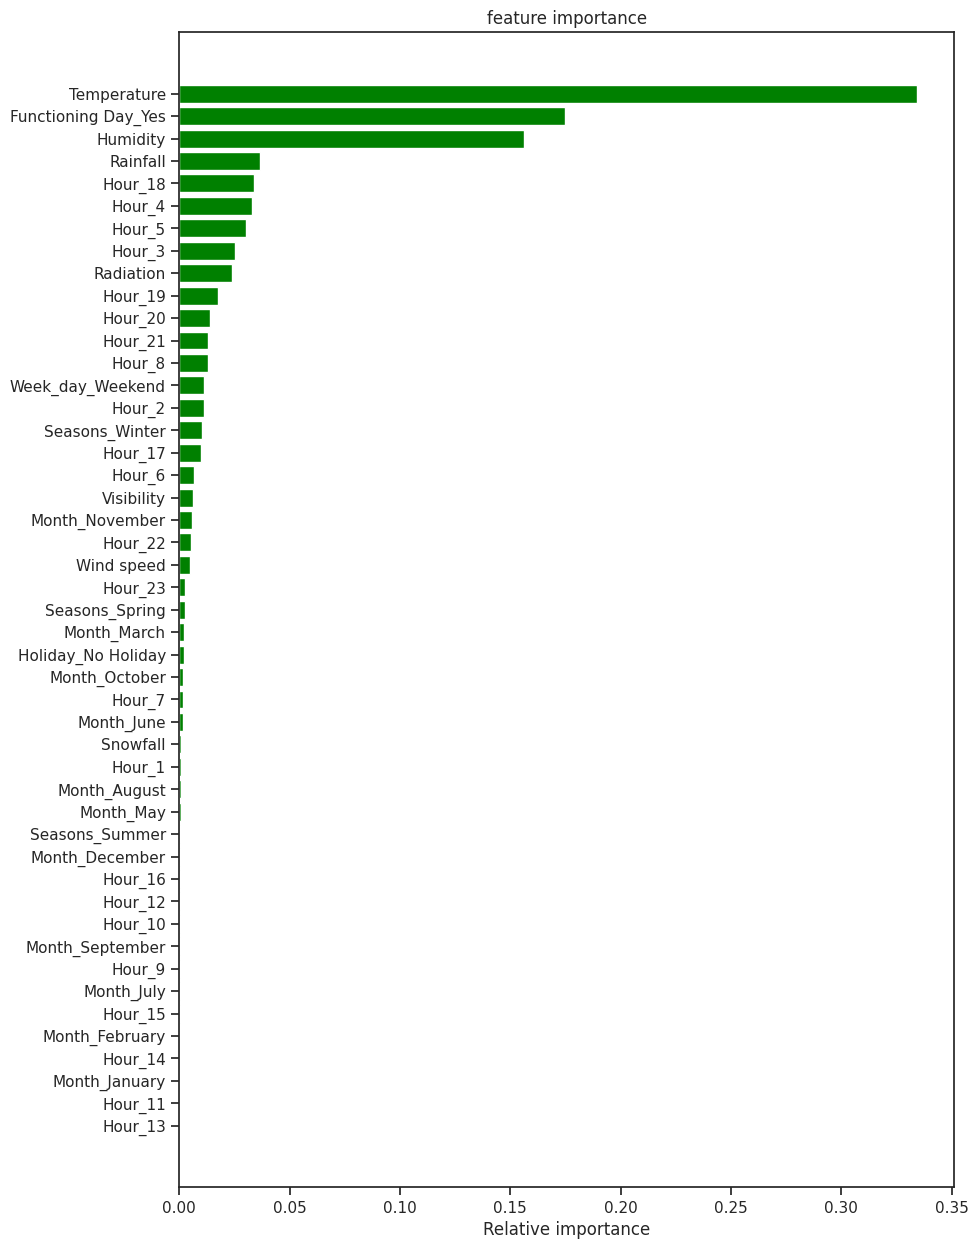

In [84]:
plt.figure(figsize=(10,15))
plt.title("feature importance")
plt.barh(range(len(indices)),importance_rf[indices],color="green",align="center")

plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel("Relative importance")
plt.show()

# Training Random forest Regressor from GridesearchCV

In [85]:
# number of trees
n_estimators=[50,80,100]

#max depth of tree
max_depth=[4,6,8,10]

#minimum no of sample required for spliting the node
min_samples_split=[50,100,150]

#minimum no of sample required at each leaf node
min_samples_leaf=[40,50,80,100]
#hyper parametr gride
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}


# Importing Random forest Regressor

In [87]:
pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 6.6 MB/s eta 0:00:00


In [88]:
import optuna

def objective(trial):

    # Define the search space for hyperparameters
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500, step=50),
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'min_samples_split': trial.suggest_int('min_samples_split', 50, 400),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 40, 300),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])
    }

    # Create and train the model with the current hyperparameters
    model = RandomForestRegressor(**params)
    model.fit(X_train, y_train)

    # Evaluate the model on the validation set
    y_pred = model.predict(X_test)
    r2_Score = r2_score(y_test, y_pred)

    return r2_Score

# Run the optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=250)

# Print the best hyperparameters and loss
best_params = study.best_params
best_score = study.best_value
print('Best Parameters:', best_params)
print('Best Score:', best_score)

[I 2023-06-18 05:29:06,702] A new study created in memory with name: no-name-8fe332c5-458c-489b-97e5-88ebb5cf386b
[I 2023-06-18 05:29:07,826] Trial 0 finished with value: 0.3998269921349318 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_samples_split': 239, 'min_samples_leaf': 156, 'max_features': 'log2'}. Best is trial 0 with value: 0.3998269921349318.
[I 2023-06-18 05:29:08,415] Trial 1 finished with value: 0.3786487059625221 and parameters: {'n_estimators': 200, 'max_depth': 5, 'min_samples_split': 187, 'min_samples_leaf': 185, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.3998269921349318.
[I 2023-06-18 05:29:11,780] Trial 2 finished with value: 0.48774206748761806 and parameters: {'n_estimators': 300, 'max_depth': 11, 'min_samples_split': 53, 'min_samples_leaf': 205, 'max_features': 'auto'}. Best is trial 2 with value: 0.48774206748761806.
[I 2023-06-18 05:29:12,647] Trial 3 finished with value: 0.3273221253265495 and parameters: {'n_estimators': 350, 'max_dep

Best Parameters: {'n_estimators': 350, 'max_depth': 15, 'min_samples_split': 56, 'min_samples_leaf': 40, 'max_features': 'auto'}
Best Score: 0.8312440387877977


In [89]:
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.7s
[CV] END max_depth=4, min_sa

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [40, 50, 80, 100],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [90]:
rf_optimal_model = rf_grid.best_estimator_

In [91]:
rf_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 80}

In [92]:
# Making predictions on train and test data

y_pred_train_r_g = rf_optimal_model.predict(X_train)
y_pred_test_r_g = rf_optimal_model.predict(X_test)

In [93]:
# MODEL EVALUATION ON TRAIN DATA

score_metrics(y_train,y_pred_train_r_g )
accuracies = cross_val_score(estimator = rf_model, X = X_train, y = y_train, cv = 5)
print('Cross validation accuracy :', np.mean(accuracies))

mean squared error is  : 27.4124603658442
Root mean squared error is  : 5.235691011303493
R2 score is  : 0.8212652938934663
Adjusted R2 : 0.8163354046992133
Cross validation accuracy : 0.9224701332533549


In [94]:
# MODEL EVALUATION ON TEST DATA

score_metrics(y_test,y_pred_test_r_g)


mean squared error is  : 31.620198875070972
Root mean squared error is  : 5.623184051324567
R2 score is  : 0.8041778031135683
Adjusted R2 : 0.7987766040210436


# Implementing Xgboost Regressor

In [95]:
# Create an instance of the RandomForestRegressor
import xgboost as xgb
xg_model = xgb.XGBRegressor()


xg_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [96]:
# Making predictions on train and test data

y_pred_train_xg = xg_model.predict(X_train)
y_pred_test_xg = xg_model.predict(X_test)

In [97]:
# MODEL EVALUATION ON TRAIN DATA

score_metrics(y_train,y_pred_train_xg)


mean squared error is  : 2.713351785164833
Root mean squared error is  : 1.6472254809724238
R2 score is  : 0.982308405469166
Adjusted R2 : 0.9818204330848062


In [98]:
# MODEL EVALUATION ON TEST DATA

score_metrics(y_test,y_pred_test_xg)


mean squared error is  : 10.312256657508074
Root mean squared error is  : 3.211270256068161
R2 score is  : 0.9361367472257738
Adjusted R2 : 0.9343752607936209


Feature importance selction

In [99]:
xg_model.feature_importances_

array([0.02374189, 0.01839748, 0.00118443, 0.00134644, 0.00644657,
       0.0236494 , 0.00216695, 0.00362084, 0.03938368, 0.04059222,
       0.07576479, 0.08618383, 0.01930123, 0.01367045, 0.01881852,
       0.00311458, 0.010224  , 0.00711132, 0.00135418, 0.00140422,
       0.00291159, 0.00149795, 0.00422674, 0.04051204, 0.07130646,
       0.05536186, 0.04965248, 0.02166654, 0.02628138, 0.00753951,
       0.00697539, 0.00131643, 0.05525872, 0.00669035, 0.17252442,
       0.0083773 , 0.01126882, 0.00296466, 0.00157969, 0.00059313,
       0.01394122, 0.00907246, 0.00513338, 0.00339715, 0.01001061,
       0.01068744, 0.00177525], dtype=float32)

In [100]:
importances = xg_model.feature_importances_

importance_dictxg = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

importance_dfxg = pd.DataFrame(importance_dictxg)

In [101]:
importance_dfxg['Feature Importance'] = round(importance_dfxg['Feature Importance'],2)

In [102]:
xg_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

# Features importance with XGBOOST training

In [103]:
features = X.columns
importances = xg_model.feature_importances_
indices = np.argsort(importances)

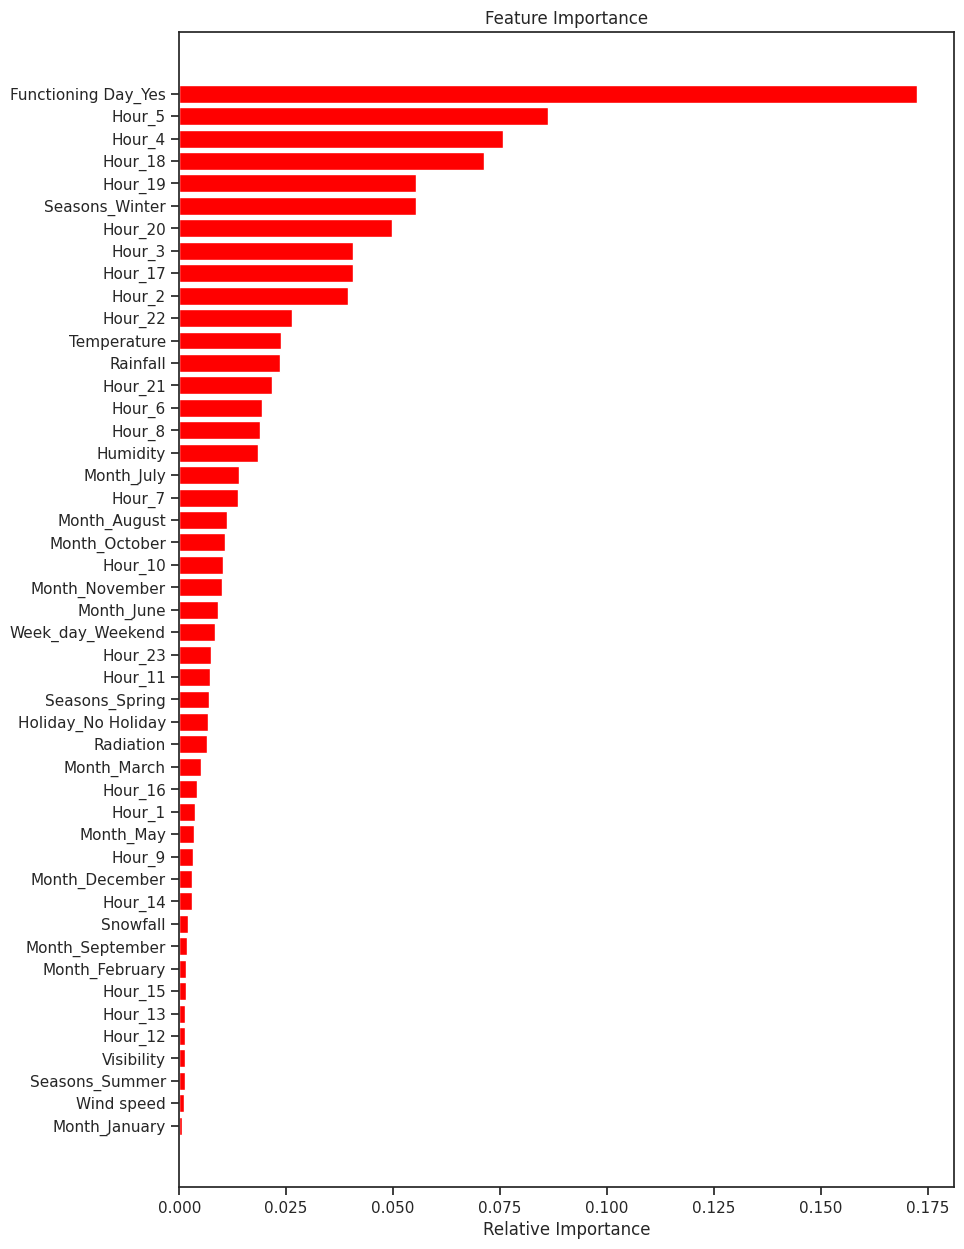

In [104]:
plt.figure(figsize=[10,15])
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# Training Xgboost regressor with Gridsearch

# Provide the range for Hyperparameter

In [105]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict_xgb = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,'learning_rate': [0.1, 0.05, 0.01, 0.005]}

In [106]:
import xgboost as xgb
xg_model = xgb.XGBRegressor()


xg_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
# Grid search
xg_grid = GridSearchCV(estimator=xg_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

xg_grid.fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[06:07:53] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[06:07:54] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[06:07:54] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[06:07:55] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[06:07:55] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_le

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [40, 50, 80, 100],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [ ]:
xg_grid.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, min_samples_leaf=40, min_samples_split=50,
             missing=nan, monotone_constraints=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
xg_optimal_model = xg_grid.best_estimator_

In [ ]:
xg_grid.best_params_

{'max_depth': 6,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [ ]:
# Making predictions on train and test data

y_pred_train_x_g = xg_optimal_model.predict(X_train)
y_pred_test_x_g  = xg_optimal_model.predict(X_test)

In [ ]:
# MODEL EVALUATION ON TEST DATA

score_metrics(y_train,y_pred_train_x_g)


mean squared error is  : 2.713351785164833
Root mean squared error is  : 1.6472254809724238
R2 score is  : 0.982308405469166
Adjusted R2 : 0.9818204330848062


In [ ]:
# MODEL EVALUATION ON TEST DATA

score_metrics(y_test,y_pred_test_x_g)


mean squared error is  : 10.312256657508074
Root mean squared error is  : 3.211270256068161
R2 score is  : 0.9361367472257738
Adjusted R2 : 0.9343752607936209


# Model Summary for the train data set

In [ ]:
from prettytable import PrettyTable
train = PrettyTable(['SL NO',"MODEL_NAME", "MSE", "RMSE",'R^2','Adjusted R^2'])
train.add_row(['1','Linear Regression','28.94','5.37','0.81',' 0.80'])
train.add_row(['2','Polyomial Features','11.09','3.33','0.93','0.92'])
train.add_row(['3','KNN Regression','16.5','4.07','0.89','0.88'])
train.add_row(['4','Decision Tree regressor','35.82','5.98','0.76','0.75'])
train.add_row(['5','Random forest regressor','13.77','3.71','0.91','0.90'])
train.add_row(['6','XGBoost','2.71','1.64','0.98','0.984'])
print(train)

+-------+-------------------------+-------+------+------+--------------+
| SL NO |        MODEL_NAME       |  MSE  | RMSE | R^2  | Adjusted R^2 |
+-------+-------------------------+-------+------+------+--------------+
|   1   |    Linear Regression    | 28.94 | 5.37 | 0.81 |     0.80     |
|   2   |    Polyomial Features   | 11.09 | 3.33 | 0.93 |     0.92     |
|   3   |      KNN Regression     |  16.5 | 4.07 | 0.89 |     0.88     |
|   4   | Decision Tree regressor | 35.82 | 5.98 | 0.76 |     0.75     |
|   5   | Random forest regressor | 13.77 | 3.71 | 0.91 |     0.90     |
|   6   |         XGBoost         |  2.71 | 1.64 | 0.98 |    0.984     |
+-------+-------------------------+-------+------+------+--------------+


# Model Summary for the test data set

In [ ]:
from prettytable import PrettyTable
test = PrettyTable(['SL NO',"MODEL_NAME", "MSE", "RMSE",'R^2','Adjusted R^2'])
test.add_row(['1','Linear Regression','30.99','5.56','0.81','0.80'])
test.add_row(['2','Polynomial Feature','17.29','4.15','0.89','0.88'])
test.add_row(['3','kNN regressor','29.53','5.43','0.81','0.81'])
test.add_row(['4','Decision Tree regressor','44.39','6.66','0.72','0.71'])
test.add_row(['5','Random forest regressor','21.6','4.64','0.874','0.870'])
test.add_row(['6','XGBoost','10.31','3.211','0.93','0.92'])
print(test)

+-------+-------------------------+-------+-------+-------+--------------+
| SL NO |        MODEL_NAME       |  MSE  |  RMSE |  R^2  | Adjusted R^2 |
+-------+-------------------------+-------+-------+-------+--------------+
|   1   |    Linear Regression    | 30.99 |  5.56 |  0.81 |     0.80     |
|   2   |    Polynomial Feature   | 17.29 |  4.15 |  0.89 |     0.88     |
|   3   |      kNN regressor      | 29.53 |  5.43 |  0.81 |     0.81     |
|   4   | Decision Tree regressor | 44.39 |  6.66 |  0.72 |     0.71     |
|   5   | Random forest regressor |  21.6 |  4.64 | 0.874 |    0.870     |
|   6   |         XGBoost         | 10.31 | 3.211 |  0.93 |     0.92     |
+-------+-------------------------+-------+-------+-------+--------------+


# Conclusion:

On the basis of model evaluation metrics XGBOOST is giving best results followed by Polynomial Regression and Random Forest.
